In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from XRD import crystal, Element, XRD
import sys
import os
from similarity import Similarity

In [2]:
def testFWHM(structure, max2theta, ext1, ext2, profiling):
    wavelength = 1.54056
    path = './data/'
    if ext1 == 'POSCAR':
        struct = crystal(ext1,filename=path+structure+'-'+ext1)
    else:
        struct = crystal(ext1,filename=path+structure+'.'+ext1)

    # pxrd 
    xrd1 = XRD(struct, wavelength, max2theta, False, 0.55) 
    xrd1.get_profile(xrd1.theta2,xrd1.xrd_intensity/np.max(xrd1.xrd_intensity),N,**profiling)

    # profiling from vesta  
    merc_pattern = np.loadtxt(structure+'.'+ext2)
    mx = merc_pattern[:,0]
    my = merc_pattern[:,1]/ np.max(merc_pattern[:,1])
    patterng = np.vstack((mx,my))

    plt.figure(figsize=(15,4))
    plt.plot(xrd1.spectra[0],xrd1.spectra[1],'b--',label = 'pxrd')
    plt.plot(mx,my, 'orange',label = 'vesta')
    plt.legend()
    plt.show()

    S = Similarity(xrd1.spectra, patterng, N, None, 1, 'cosine')
    print('Similarity = ',S.calculate())

In [3]:
N = 10000    
U = 5.776410E-03 # FWHM parameter, U
V = -1.673830E-03 # FWHM parameter, V
W = 5.668770E-03 # FWHM parameter, W
A = 1.03944 # Asymmetry parameter, a1
eta_h = 0.504656 # Mixing parameter, eta_H0
eta_l = 0.611844  # Mixing parameter, eta_L0

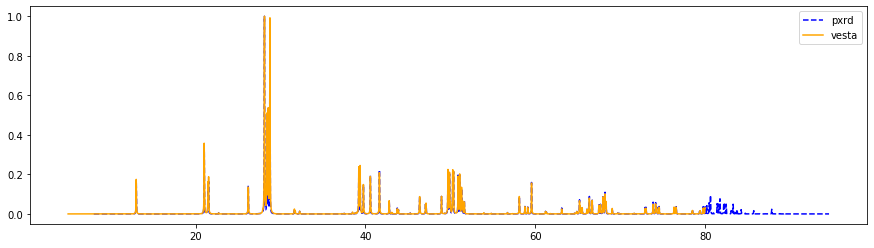

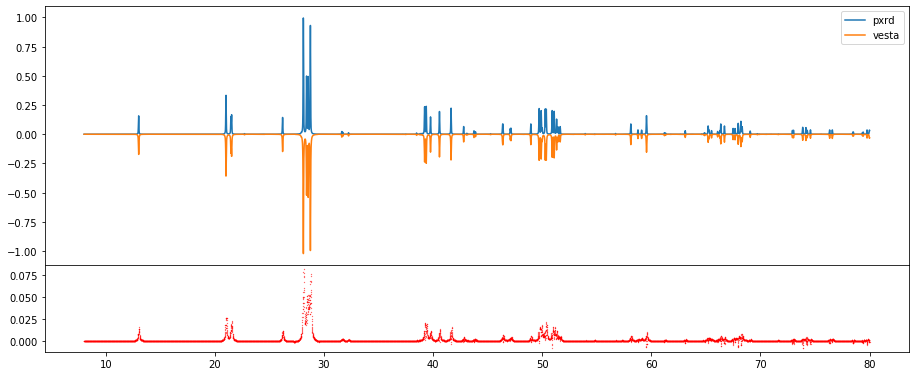

Similarity =  0.9955840360412733


In [4]:
# mercury
profiling = {'function':'split-type', 'FWHM': 0.05, 'A':A, 'eta_h':eta_h, 'eta_l':eta_l}
testFWHM('A2=a', 90,'POSCAR', 'tsv',profiling)

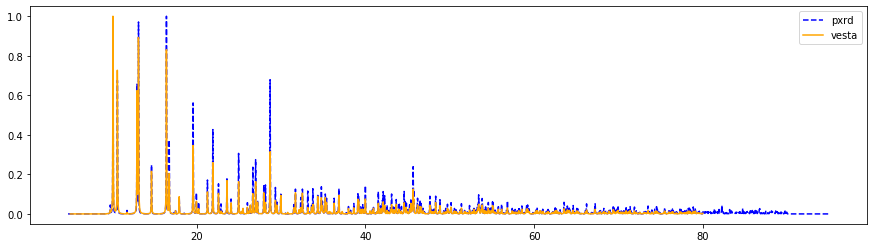

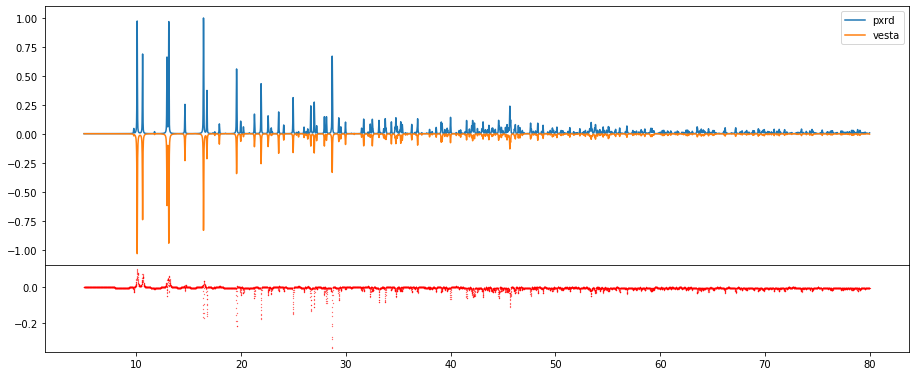

Similarity =  0.963129072813167


In [5]:
# mercury
testFWHM('Bba2', 90,'POSCAR', 'tsv',profiling)

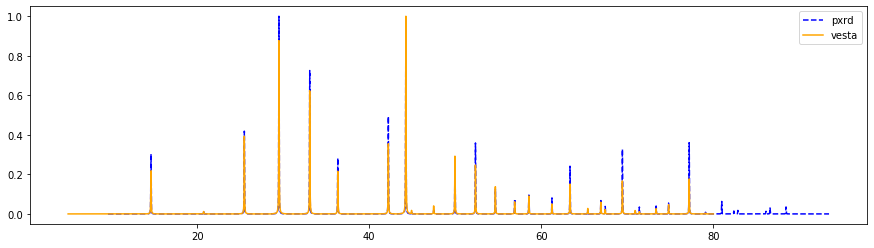

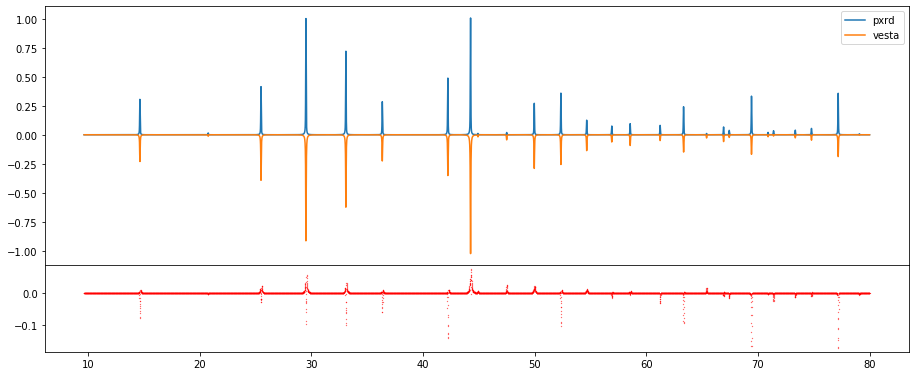

Similarity =  0.9839835346907343


In [6]:
# mercury
testFWHM('F-43c', 90,'POSCAR', 'tsv',profiling)

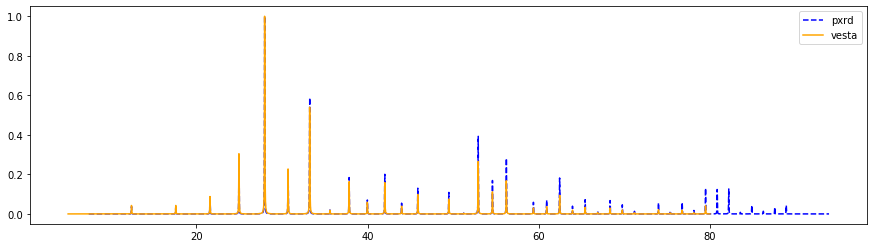

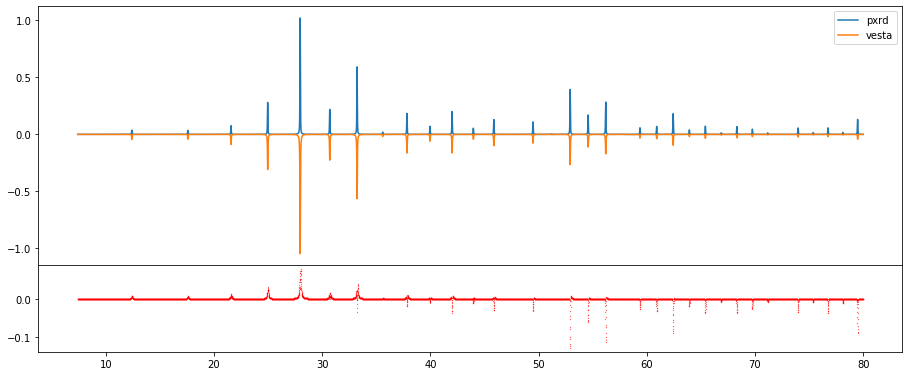

Similarity =  0.980309899189405


In [7]:
# mercury
testFWHM('I23', 90,'POSCAR', 'tsv',profiling)

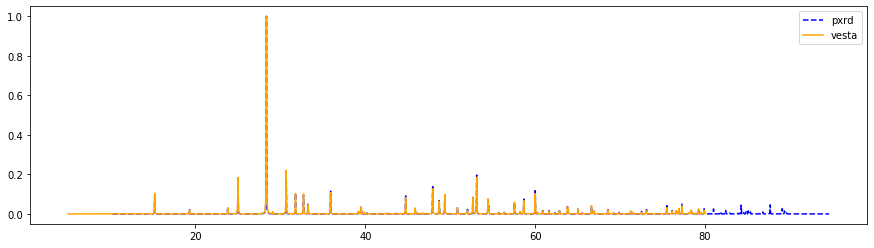

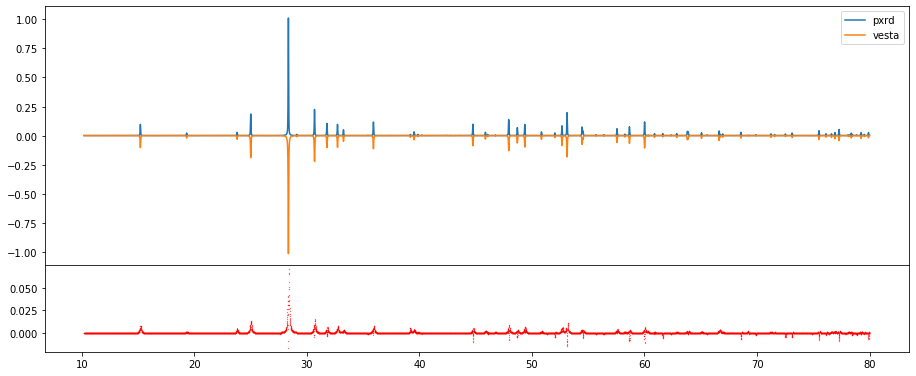

Similarity =  0.9961667760980076


In [8]:
# mercury
testFWHM('Pnna', 90,'POSCAR', 'tsv',profiling)

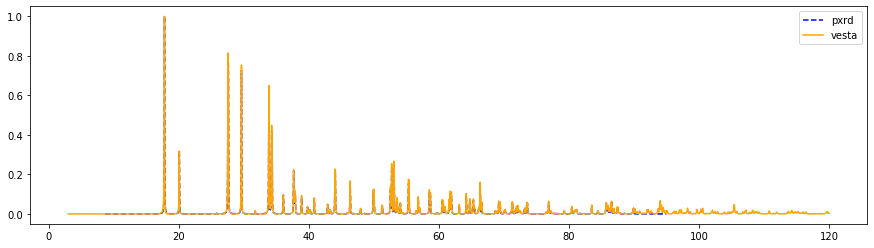

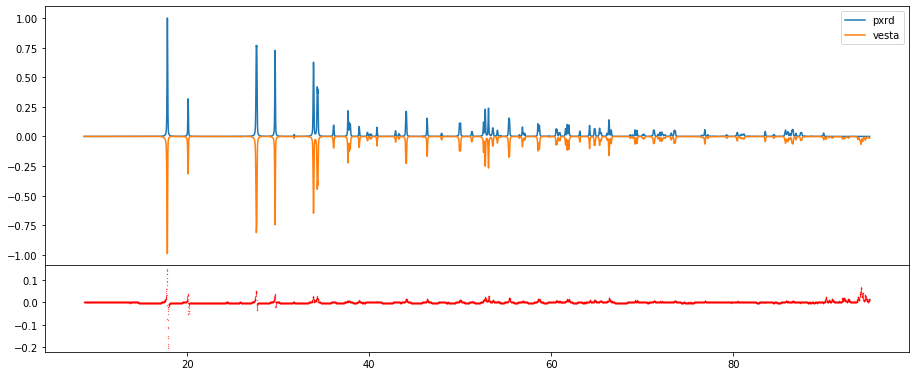

Similarity =  0.9901522013524864


In [9]:
# vesta
profiling = {'function':'split-type', 'theta_dependence': True, 'U': U, 'V':V, 'W':W, 'A':A, 'eta_h':eta_h, 'eta_l':eta_l}
testFWHM('A-1', 90, 'POSCAR', 'gpd',profiling)

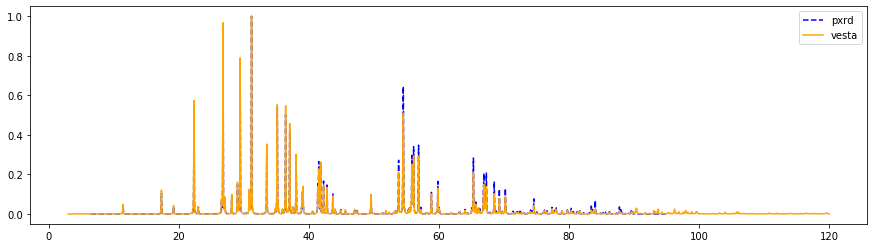

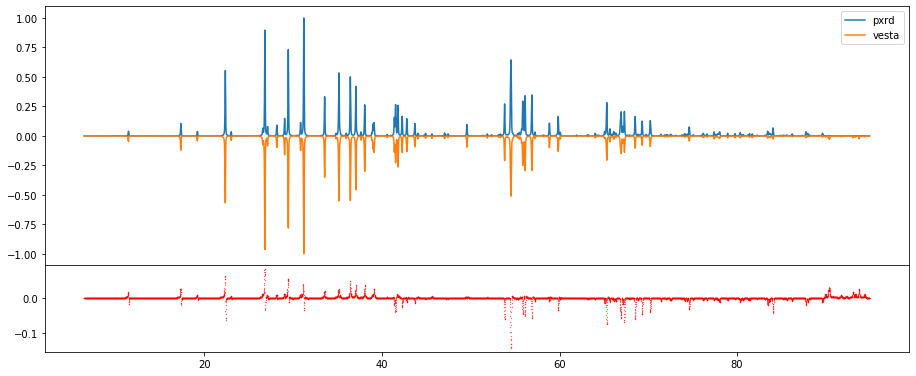

Similarity =  0.9895430751691405


In [10]:
# vesta
testFWHM('B-1',90, 'POSCAR', 'gpd',profiling)

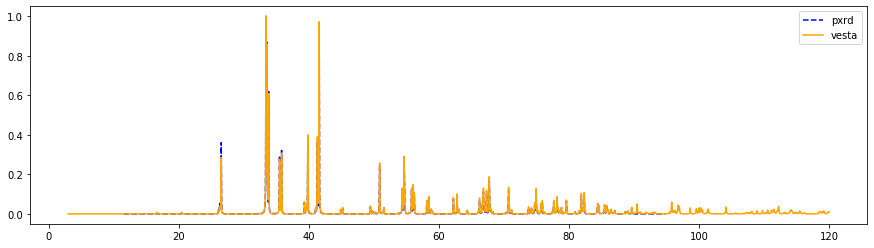

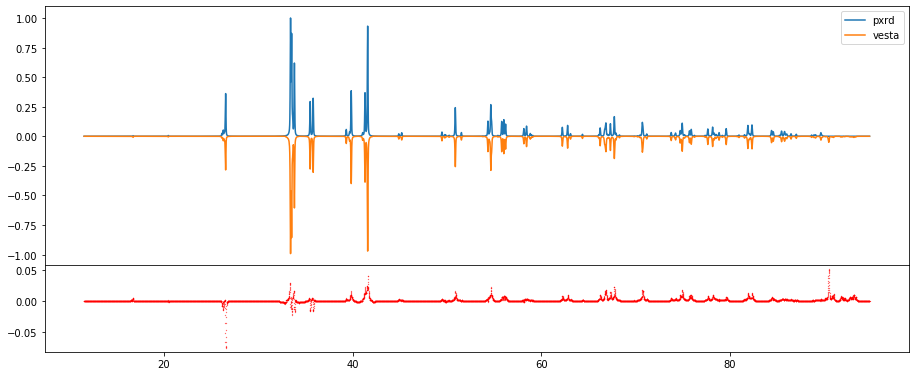

Similarity =  0.9972578555665274


In [11]:
# vesta
testFWHM('Cm', 90, 'POSCAR', 'gpd',profiling)

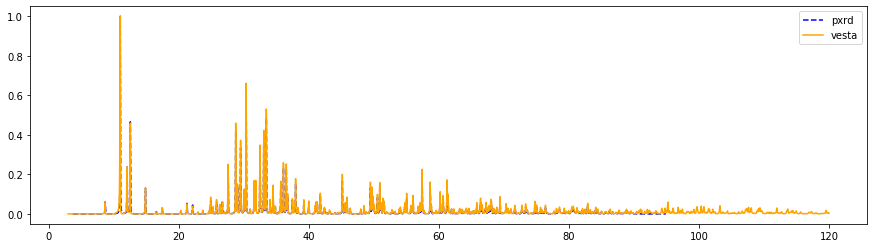

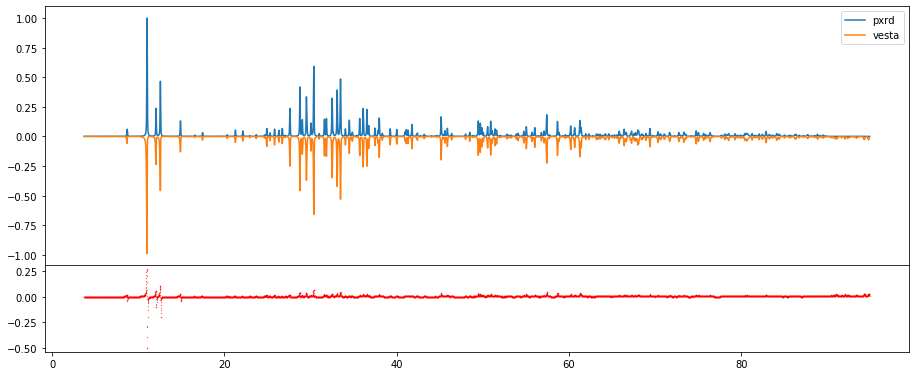

Similarity =  0.9557641985656579


In [12]:
# vesta
testFWHM('Cccm', 90, 'POSCAR', 'gpd',profiling)

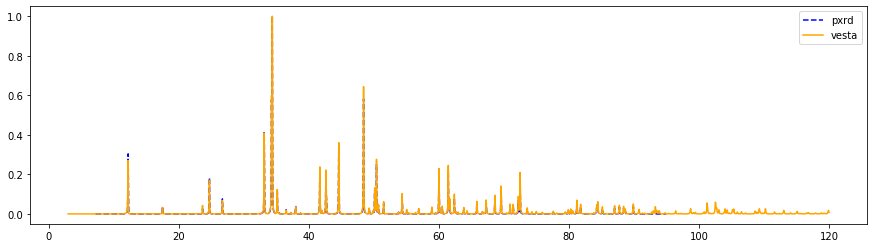

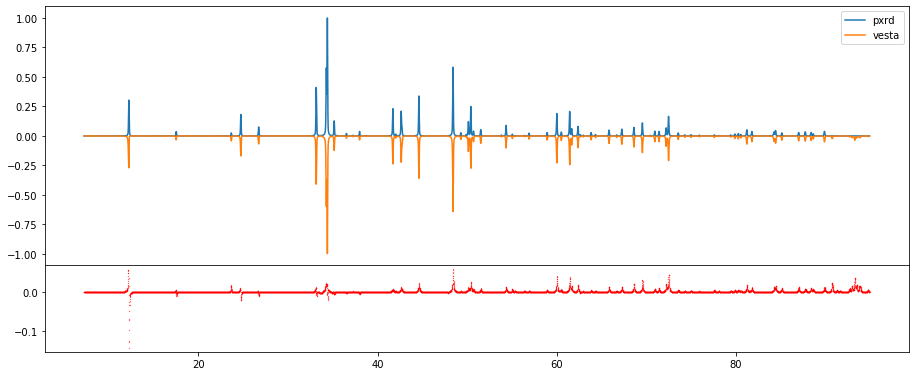

Similarity =  0.993202173162265


In [13]:
# vesta
testFWHM('I2mb', 90, 'POSCAR', 'gpd',profiling)

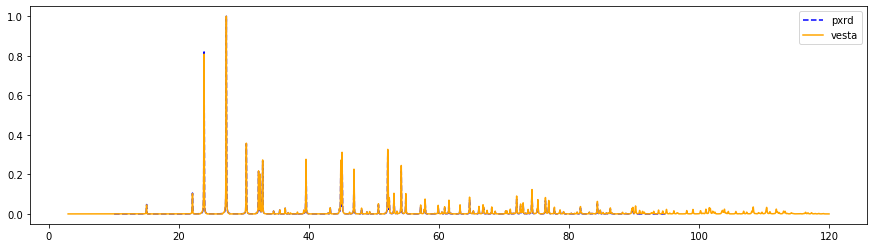

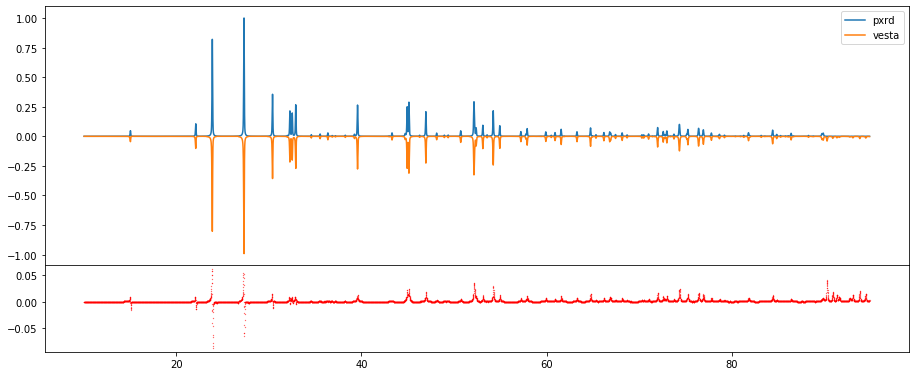

Similarity =  0.9944112081550799


In [14]:
# vesta
testFWHM('Pcab', 90, 'POSCAR', 'gpd',profiling)

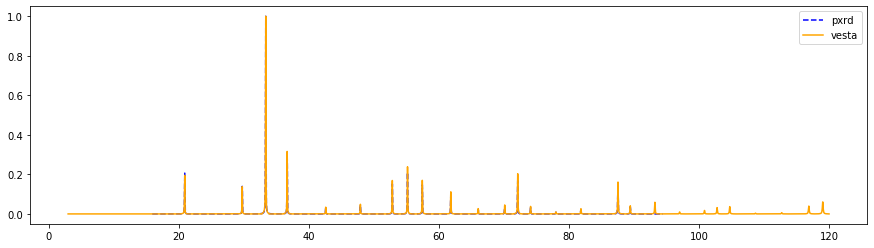

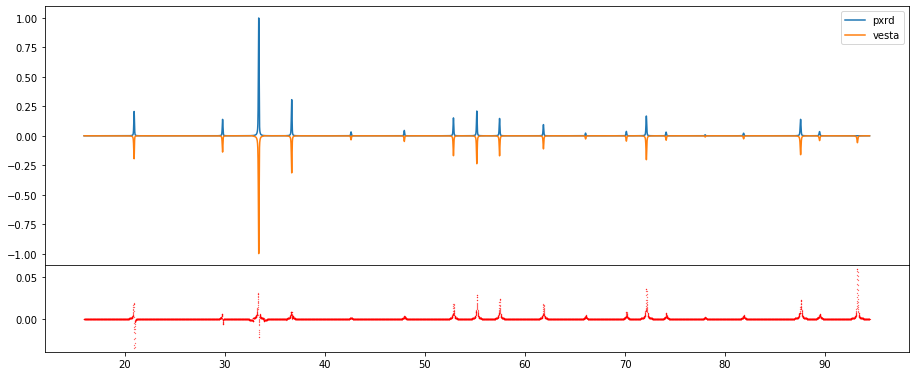

Similarity =  0.995767897897437


In [15]:
# vesta
testFWHM('P-43n', 90, 'POSCAR', 'gpd',profiling)

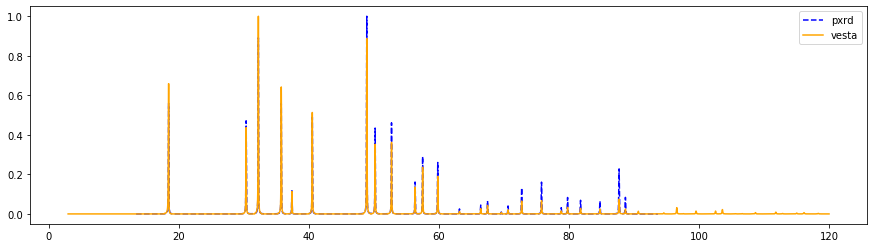

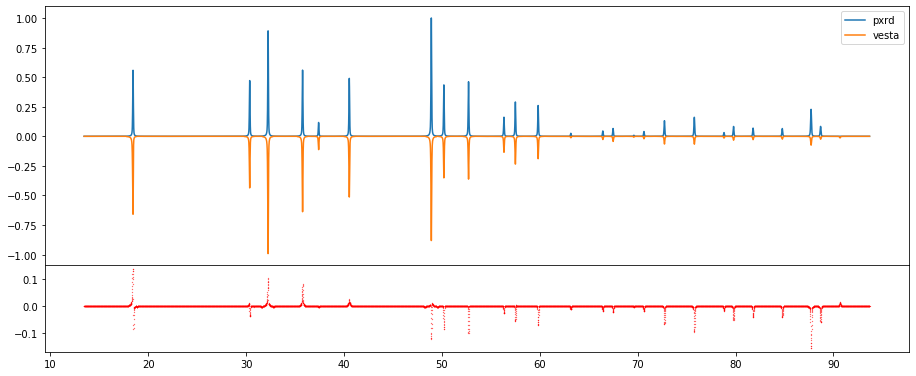

Similarity =  0.9794962932265947


In [16]:
# vesta
testFWHM('R3m', 90, 'POSCAR', 'gpd',profiling)

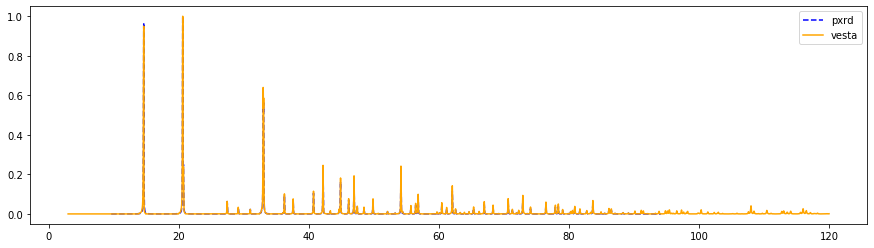

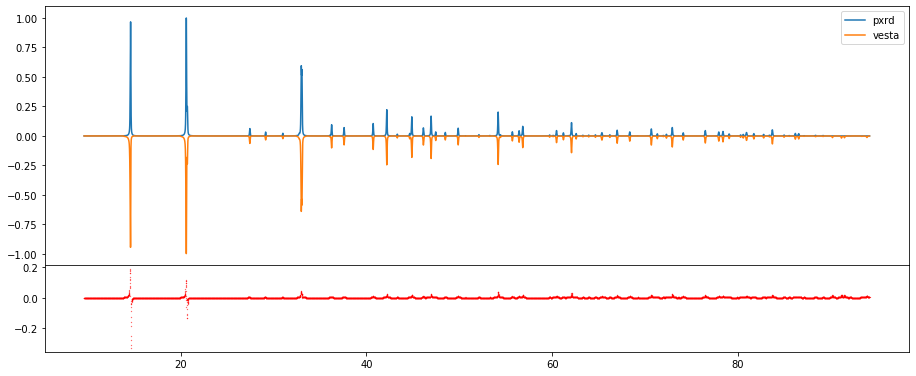

Similarity =  0.9775708876384702


In [17]:
# vesta
testFWHM('P4_2=ncm', 90, 'POSCAR', 'gpd',profiling)

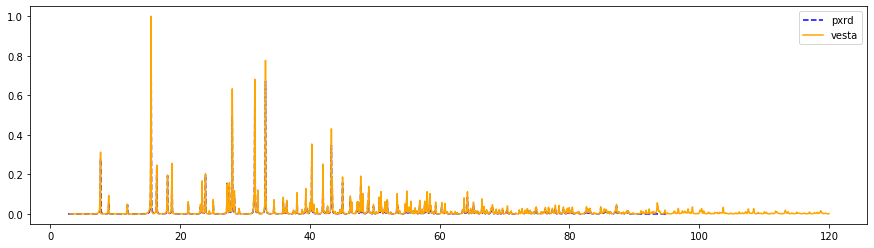

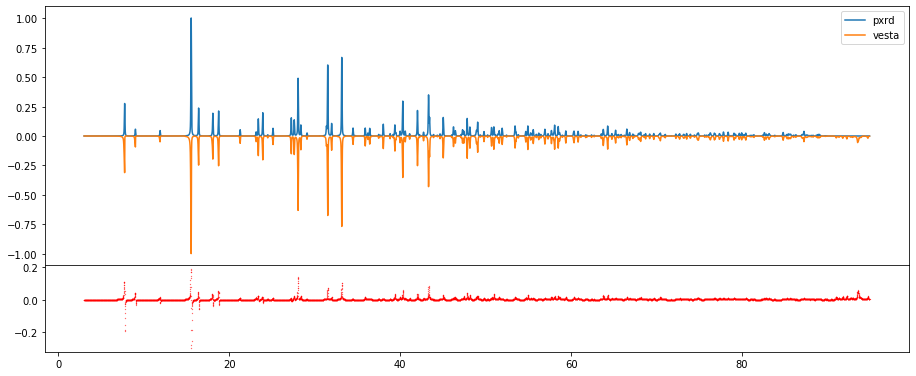

Similarity =  0.9733064524083149


In [18]:
# vesta
testFWHM('Pmma', 90, 'POSCAR', 'gpd',profiling)